# Autoencoder

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv('your_dataset.csv')

# Assuming 'Class' is the label column (0 for normal, 1 for fraud)
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (use only normal transactions for training)
X_train, X_test, y_train, y_test = train_test_split(X_scaled[y == 0], y[y == 0], test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  # Adjust this based on your data

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Reconstruct the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Calculate reconstruction error (Mean Squared Error)
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Set a threshold for detecting anomalies
threshold = np.percentile(mse, 95)  # You can adjust this threshold

# Flag potential frauds
y_pred = [1 if e > threshold else 0 for e in mse]

# Evaluate the results
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

2025-05-07 15:32:41.852166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-07 15:32:41.922724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746624761.952252     517 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746624761.960616     517 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-07 15:32:42.017012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

# Dropping records

In [39]:
# Dropping records
import pandas as pd

# Sample DataFrames
data1 = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
}
data2 = {
    'C': [10, 20],
    'D': [30, 40]
}

df1 = pd.DataFrame(data1, index=[0, 1, 2, 3, 4])
df2 = pd.DataFrame(data2, index=[1, 3])  # Indices to drop from df1

# Display original DataFrames
print("Original df1:")
print(df1)
print("\nOriginal df2:")
print(df2)


Original df1:
   A  B
0  1  5
1  2  4
2  3  3
3  4  2
4  5  1

Original df2:
    C   D
1  10  30
3  20  40


In [42]:

# Drop records in df1 that have the same index as those in df2
df1_dropped = df1.drop(df2.index, axis=0)

# Display the modified DataFrame
print("\nModified df1 after dropping indices from df2:")
print(df1_dropped)


Modified df1 after dropping indices from df2:
   A  B
0  1  5
2  3  3
4  5  1


# Shuffling dataframe

In [8]:
creditcard_input_dataset = pd.read_csv('creditcard.csv')
creditcard_input_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
display(creditcard_input_dataset["Class"].unique())

array([0, 1])

In [26]:
samples_1 = creditcard_input_dataset.sample(5, replace = False, axis = 0)
samples_2 = creditcard_input_dataset.sample(5, replace = False, axis = 0)
display(samples_1, samples_2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228820,145678.0,-1.267136,0.991373,-1.044977,0.472219,0.714481,-1.106043,1.509166,-0.662605,0.997475,...,-0.277575,0.266164,0.069841,-0.186814,-0.688727,-0.373722,-0.494538,-0.114073,81.35,0
141513,84366.0,-1.610346,1.323497,1.799854,-0.758163,-0.114976,-0.049563,0.561707,0.252593,0.343320,...,-0.443183,-0.890635,-0.157142,0.006706,0.445917,0.146548,0.563675,0.317149,20.00,0
240198,150480.0,-0.554910,0.714797,1.455029,0.762760,0.509384,0.275293,0.280130,0.242789,-0.412477,...,-0.109243,-0.204137,0.033158,-0.516414,-0.458048,-0.803072,0.455892,0.237854,23.98,0
31224,36269.0,-2.267570,0.181299,0.340281,1.062632,-0.138897,-0.361465,0.359393,0.529115,-0.422641,...,0.125097,0.543949,-0.221718,0.254347,-0.247876,-0.308623,0.625304,0.255346,153.47,0
200031,133248.0,-0.999976,-0.574513,-1.104997,-1.217861,1.712697,0.136681,0.138267,0.815661,0.003202,...,0.256424,0.326726,0.547771,-1.441095,-2.157337,-0.176512,0.193963,0.097276,53.16,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0


In [38]:
samples_2_x_2 = pd.concat([samples_2] * 2, axis=0)
display(samples_2_x_2)
total = pd.concat([samples_1, samples_2_x_2], axis=0)
display(total)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228820,145678.0,-1.267136,0.991373,-1.044977,0.472219,0.714481,-1.106043,1.509166,-0.662605,0.997475,...,-0.277575,0.266164,0.069841,-0.186814,-0.688727,-0.373722,-0.494538,-0.114073,81.35,0
141513,84366.0,-1.610346,1.323497,1.799854,-0.758163,-0.114976,-0.049563,0.561707,0.252593,0.343320,...,-0.443183,-0.890635,-0.157142,0.006706,0.445917,0.146548,0.563675,0.317149,20.00,0
240198,150480.0,-0.554910,0.714797,1.455029,0.762760,0.509384,0.275293,0.280130,0.242789,-0.412477,...,-0.109243,-0.204137,0.033158,-0.516414,-0.458048,-0.803072,0.455892,0.237854,23.98,0
31224,36269.0,-2.267570,0.181299,0.340281,1.062632,-0.138897,-0.361465,0.359393,0.529115,-0.422641,...,0.125097,0.543949,-0.221718,0.254347,-0.247876,-0.308623,0.625304,0.255346,153.47,0
200031,133248.0,-0.999976,-0.574513,-1.104997,-1.217861,1.712697,0.136681,0.138267,0.815661,0.003202,...,0.256424,0.326726,0.547771,-1.441095,-2.157337,-0.176512,0.193963,0.097276,53.16,0
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0


In [27]:
from sklearn.utils import shuffle
geshuffeld_1, geshuffeld_2 = shuffle(samples_1, samples_2, random_state=1)
display(geshuffeld_1, geshuffeld_2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
240198,150480.0,-0.554910,0.714797,1.455029,0.762760,0.509384,0.275293,0.280130,0.242789,-0.412477,...,-0.109243,-0.204137,0.033158,-0.516414,-0.458048,-0.803072,0.455892,0.237854,23.98,0
141513,84366.0,-1.610346,1.323497,1.799854,-0.758163,-0.114976,-0.049563,0.561707,0.252593,0.343320,...,-0.443183,-0.890635,-0.157142,0.006706,0.445917,0.146548,0.563675,0.317149,20.00,0
200031,133248.0,-0.999976,-0.574513,-1.104997,-1.217861,1.712697,0.136681,0.138267,0.815661,0.003202,...,0.256424,0.326726,0.547771,-1.441095,-2.157337,-0.176512,0.193963,0.097276,53.16,0
228820,145678.0,-1.267136,0.991373,-1.044977,0.472219,0.714481,-1.106043,1.509166,-0.662605,0.997475,...,-0.277575,0.266164,0.069841,-0.186814,-0.688727,-0.373722,-0.494538,-0.114073,81.35,0
31224,36269.0,-2.267570,0.181299,0.340281,1.062632,-0.138897,-0.361465,0.359393,0.529115,-0.422641,...,0.125097,0.543949,-0.221718,0.254347,-0.247876,-0.308623,0.625304,0.255346,153.47,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0


In [28]:
ss = samples

In [34]:
xx = pd.concat([geshuffeld_1, geshuffeld_2])
display(xx)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
240198,150480.0,-0.554910,0.714797,1.455029,0.762760,0.509384,0.275293,0.280130,0.242789,-0.412477,...,-0.109243,-0.204137,0.033158,-0.516414,-0.458048,-0.803072,0.455892,0.237854,23.98,0
141513,84366.0,-1.610346,1.323497,1.799854,-0.758163,-0.114976,-0.049563,0.561707,0.252593,0.343320,...,-0.443183,-0.890635,-0.157142,0.006706,0.445917,0.146548,0.563675,0.317149,20.00,0
200031,133248.0,-0.999976,-0.574513,-1.104997,-1.217861,1.712697,0.136681,0.138267,0.815661,0.003202,...,0.256424,0.326726,0.547771,-1.441095,-2.157337,-0.176512,0.193963,0.097276,53.16,0
228820,145678.0,-1.267136,0.991373,-1.044977,0.472219,0.714481,-1.106043,1.509166,-0.662605,0.997475,...,-0.277575,0.266164,0.069841,-0.186814,-0.688727,-0.373722,-0.494538,-0.114073,81.35,0
31224,36269.0,-2.267570,0.181299,0.340281,1.062632,-0.138897,-0.361465,0.359393,0.529115,-0.422641,...,0.125097,0.543949,-0.221718,0.254347,-0.247876,-0.308623,0.625304,0.255346,153.47,0
247318,153538.0,-0.261252,0.485778,0.514459,-2.137777,1.097050,-1.018947,1.278120,-0.426824,0.096021,...,-0.254064,-0.646736,-0.029484,0.681736,-0.492329,0.343817,-0.135564,-0.071591,4.00,0
82241,59320.0,-1.219758,1.616118,0.800356,-0.307697,0.063283,-0.517222,0.617247,0.120286,0.092632,...,-0.389955,-0.677823,-0.060746,-0.063505,-0.026386,0.034413,0.103796,-0.230581,10.76,0
185368,126636.0,1.943296,-0.526380,-0.373007,0.350864,-0.344109,0.407066,-0.764966,0.092227,1.182173,...,0.007236,0.099785,0.207532,0.071233,-0.397430,0.169693,0.001653,-0.024231,52.16,0
29798,35634.0,1.374193,-0.720679,0.891375,-0.541402,-1.715468,-1.105018,-0.996347,-0.014915,-0.214415,...,0.292872,0.689335,-0.009424,0.683422,0.330938,-0.116640,0.012395,0.019778,6.00,0
63027,50525.0,-1.542830,0.510266,2.533331,1.196876,-1.288897,0.063214,0.953468,-0.190214,-0.035773,...,-0.063084,0.580712,0.215316,0.962597,0.267176,-0.351077,-0.338688,-0.560247,187.13,0


# Numpy percentiles

In [47]:
import numpy as np
 
# 1D array
arr = [20, 2, 7, 1, 34]
print("arr : ", arr)
print("50th percentile of arr : ",
      np.percentile(arr, 50))
print("25th percentile of arr : ",
      np.percentile(arr, 25))
print("75th percentile of arr : ",
      np.percentile(arr, 75))
print("95th percentile of arr : ",
      np.percentile(arr, 10))

arr :  [20, 2, 7, 1, 34]
50th percentile of arr :  7.0
25th percentile of arr :  2.0
75th percentile of arr :  20.0
95th percentile of arr :  1.4


In [ ]:
# Autoencoder with Convolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Create occlusions in the images (e.g., masking a central square)
def add_occlusion(images, occlusion_size=14):
    occluded_images = images.copy()
    h, w = images.shape[1], images.shape[2]
    start_h, start_w = (h - occlusion_size) // 2, (w - occlusion_size) // 2
    occluded_images[:, start_h:start_h + occlusion_size, start_w:start_w + occlusion_size, :] = 0
    return occluded_images

x_train_occluded = add_occlusion(x_train)
x_test_occluded = add_occlusion(x_test)

# Build the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_occluded, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test_occluded, x_test))

# Reconstruct the occluded images
reconstructed_images = autoencoder.predict(x_test_occluded)

# Plot the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Display occluded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_occluded[i].reshape(28, 28), cmap='gray')
    plt.title("Occluded")
    plt.axis("off")

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

# Dataframe interating

In [11]:
df = pd.DataFrame( data={"A": [1,2,3,4,5], "B": [11,22,33,44,55]})
for i, r in df.iterrows():
    print(i, r["A"], r["B"])

0 1 11
1 2 22
2 3 33
3 4 44
4 5 55


# Random

In [14]:
number_1 = 10
number_2 = 20
max(number_1, number_2)

20

In [13]:
df.shape

(5, 2)

In [21]:
14 // 5

2

In [22]:
import random
n = random.randint(5, 10)
print(n)

9


In [25]:
import random
from PIL import Image, ImageDraw
MAXIMUM_OCCLUSION_FACTOR = 3

width, height = 50,50
occlusion_width = random.randint(5, int(width / MAXIMUM_OCCLUSION_FACTOR))
occlusion_height = random.randint(5, int(height / MAXIMUM_OCCLUSION_FACTOR))

left_corner_x = random.randint(0, width - occlusion_width)
left_corner_y = random.randint(0, height - occlusion_height)

print(occlusion_width, occlusion_height)
print(left_corner_x, left_corner_y)

12 10
23 24


In [ ]:
# Rebuilding df

In [33]:
import pandas as pd
df = pd.DataFrame(data = {
    "aa": ['a', 'b', 'c'],
    "v1": [1, 2, 3],
    "v2": [11, 22, 33],
    "v3": [111, 222, 333],
})


In [11]:
df

,aa,v1,v2
0,a,1,11
1,b,2,22
2,c,3,33


In [34]:
xx = df["aa"].repeat(3).reset_index(drop=True)
xx

0    a
1    a
2    a
3    b
4    b
5    b
6    c
7    c
8    c
Name: aa, dtype: object

In [35]:
v = pd.concat([df["v1"], df["v2"], df["v3"]]).reset_index(drop=True)
v

0      1
1      2
2      3
3     11
4     22
5     33
6    111
7    222
8    333
dtype: int64

In [36]:
df_new = pd.DataFrame(data = {
    "aa": xx,
    "v": v
})

df_new

,aa,v
0,a,1
1,a,2
2,a,3
3,b,11
4,b,22
5,b,33
6,c,111
7,c,222
8,c,333


In [37]:
df_new_2 = pd.DataFrame({
    "aa": df["aa"].repeat(3).reset_index(drop=True),
    "v": pd.concat([df["v1"], df["v2"], df["v3"]]).reset_index(drop=True)
})
df_new_2

,aa,v
0,a,1
1,a,2
2,a,3
3,b,11
4,b,22
5,b,33
6,c,111
7,c,222
8,c,333


In [ ]:
import pandas as pd

# Original DataFrame
df = pd.DataFrame(data={
    "aa": ['a', 'b', 'c'],
    "v1": [1, 2, 3],
    "v2": [11, 22, 33],
})

# Reshape the DataFrame
df_new_2 = pd.melt(df, id_vars=["aa"], value_vars=["v1", "v2"], value_name="v").drop(columns="variable")

print(df_new)


In [9]:
import pandas as pd

# Original DataFrame
df = pd.DataFrame(data = {
    "aa": ['a', 'b', 'c'],
    "na_1": ['x1', 'x2', 'x3'],
    "na_2": ['x11', 'x22', 'x33'],
    "v1": [1, 2, 3],
    "v2": [11, 22, 33],
    "v3": [111, 222, 333],
})

# Melt the DataFrame to reshape it
df_new_melt = pd.melt(df, id_vars=['aa', 'na_1'], value_vars=['v1', 'v2', 'v3'], var_name='variable', value_name='v')
display(df_new_melt)
# Drop the 'variable' column as it's not needed
df_new_1 = df_new_melt.drop(columns=['variable'])
display(df_new_1)

# Resetting the index for better readability (optional)
df_new = df_new_1.reset_index(drop=True)
display(df_new)

,aa,na_1,variable,v
0,a,x1,v1,1
1,b,x2,v1,2
2,c,x3,v1,3
3,a,x1,v2,11
4,b,x2,v2,22
5,c,x3,v2,33
6,a,x1,v3,111
7,b,x2,v3,222
8,c,x3,v3,333


,aa,na_1,v
0,a,x1,1
1,b,x2,2
2,c,x3,3
3,a,x1,11
4,b,x2,22
5,c,x3,33
6,a,x1,111
7,b,x2,222
8,c,x3,333


,aa,na_1,v
0,a,x1,1
1,b,x2,2
2,c,x3,3
3,a,x1,11
4,b,x2,22
5,c,x3,33
6,a,x1,111
7,b,x2,222
8,c,x3,333


In [5]:
xx = [ df[i] for i in ["v1", "v2", "v3"]]
display(xx)

[0    1
 1    2
 2    3
 Name: v1, dtype: int64,
 0    11
 1    22
 2    33
 Name: v2, dtype: int64,
 0    111
 1    222
 2    333
 Name: v3, dtype: int64]

In [7]:
display(type(xx[0]))

pandas.core.series.Series

In [3]:
AA = (1,2)
BB = (*AA, 3)
display(AA)
display(BB)

(1, 2)

(1, 2, 3)

In [1]:
import numpy as np
import pandas as pd

a = [np.random.rand(5,4) for _ in range(3)]
display(a)
image_series = pd.Series(a)
display(image_series.shape)
display(image_series)

[array([[0.06633947, 0.92216494, 0.91722475, 0.78490074],
        [0.80861371, 0.15656902, 0.56397875, 0.60385455],
        [0.49264178, 0.05698911, 0.22297908, 0.01391645],
        [0.85636107, 0.25796831, 0.80722037, 0.10617923],
        [0.78356454, 0.16902892, 0.77221892, 0.88890499]]),
 array([[0.09330299, 0.0083168 , 0.51550081, 0.19504099],
        [0.95960672, 0.19240915, 0.94347796, 0.01719744],
        [0.54044759, 0.70267556, 0.37417824, 0.22670723],
        [0.20800916, 0.72508941, 0.03571424, 0.46209487],
        [0.34164433, 0.14121415, 0.87314786, 0.52107435]]),
 array([[0.72412601, 0.7008306 , 0.22735442, 0.26518694],
        [0.53800165, 0.01436157, 0.21994788, 0.32948515],
        [0.16648957, 0.31481279, 0.14911097, 0.21523551],
        [0.3043554 , 0.52334514, 0.02769909, 0.96240643],
        [0.04228583, 0.90193569, 0.28160222, 0.08465645]])]

(3,)

0    [[0.06633947270990892, 0.9221649404425005, 0.9...
1    [[0.09330298548382132, 0.00831680247966693, 0....
2    [[0.7241260071200182, 0.7008305999589247, 0.22...
dtype: object

In [2]:
display(type(image_series[0]))

numpy.ndarray

In [3]:
X = np.stack(image_series.values)
display(X.shape)
display(X)

(3, 5, 4)

array([[[0.06633947, 0.92216494, 0.91722475, 0.78490074],
        [0.80861371, 0.15656902, 0.56397875, 0.60385455],
        [0.49264178, 0.05698911, 0.22297908, 0.01391645],
        [0.85636107, 0.25796831, 0.80722037, 0.10617923],
        [0.78356454, 0.16902892, 0.77221892, 0.88890499]],

       [[0.09330299, 0.0083168 , 0.51550081, 0.19504099],
        [0.95960672, 0.19240915, 0.94347796, 0.01719744],
        [0.54044759, 0.70267556, 0.37417824, 0.22670723],
        [0.20800916, 0.72508941, 0.03571424, 0.46209487],
        [0.34164433, 0.14121415, 0.87314786, 0.52107435]],

       [[0.72412601, 0.7008306 , 0.22735442, 0.26518694],
        [0.53800165, 0.01436157, 0.21994788, 0.32948515],
        [0.16648957, 0.31481279, 0.14911097, 0.21523551],
        [0.3043554 , 0.52334514, 0.02769909, 0.96240643],
        [0.04228583, 0.90193569, 0.28160222, 0.08465645]]])

In [4]:
X1 = np.stack(image_series.to_numpy())
display(X1.shape)
display(X1)

(3, 5, 4)

array([[[0.06633947, 0.92216494, 0.91722475, 0.78490074],
        [0.80861371, 0.15656902, 0.56397875, 0.60385455],
        [0.49264178, 0.05698911, 0.22297908, 0.01391645],
        [0.85636107, 0.25796831, 0.80722037, 0.10617923],
        [0.78356454, 0.16902892, 0.77221892, 0.88890499]],

       [[0.09330299, 0.0083168 , 0.51550081, 0.19504099],
        [0.95960672, 0.19240915, 0.94347796, 0.01719744],
        [0.54044759, 0.70267556, 0.37417824, 0.22670723],
        [0.20800916, 0.72508941, 0.03571424, 0.46209487],
        [0.34164433, 0.14121415, 0.87314786, 0.52107435]],

       [[0.72412601, 0.7008306 , 0.22735442, 0.26518694],
        [0.53800165, 0.01436157, 0.21994788, 0.32948515],
        [0.16648957, 0.31481279, 0.14911097, 0.21523551],
        [0.3043554 , 0.52334514, 0.02769909, 0.96240643],
        [0.04228583, 0.90193569, 0.28160222, 0.08465645]]])

In [5]:
X2 = np.asarray(image_series)
display(X2.shape)
display(X2)

(3,)

array([array([[0.06633947, 0.92216494, 0.91722475, 0.78490074],
              [0.80861371, 0.15656902, 0.56397875, 0.60385455],
              [0.49264178, 0.05698911, 0.22297908, 0.01391645],
              [0.85636107, 0.25796831, 0.80722037, 0.10617923],
              [0.78356454, 0.16902892, 0.77221892, 0.88890499]]),
       array([[0.09330299, 0.0083168 , 0.51550081, 0.19504099],
              [0.95960672, 0.19240915, 0.94347796, 0.01719744],
              [0.54044759, 0.70267556, 0.37417824, 0.22670723],
              [0.20800916, 0.72508941, 0.03571424, 0.46209487],
              [0.34164433, 0.14121415, 0.87314786, 0.52107435]]),
       array([[0.72412601, 0.7008306 , 0.22735442, 0.26518694],
              [0.53800165, 0.01436157, 0.21994788, 0.32948515],
              [0.16648957, 0.31481279, 0.14911097, 0.21523551],
              [0.3043554 , 0.52334514, 0.02769909, 0.96240643],
              [0.04228583, 0.90193569, 0.28160222, 0.08465645]])],
      dtype=object)

In [6]:
np.__version__

'2.0.2'

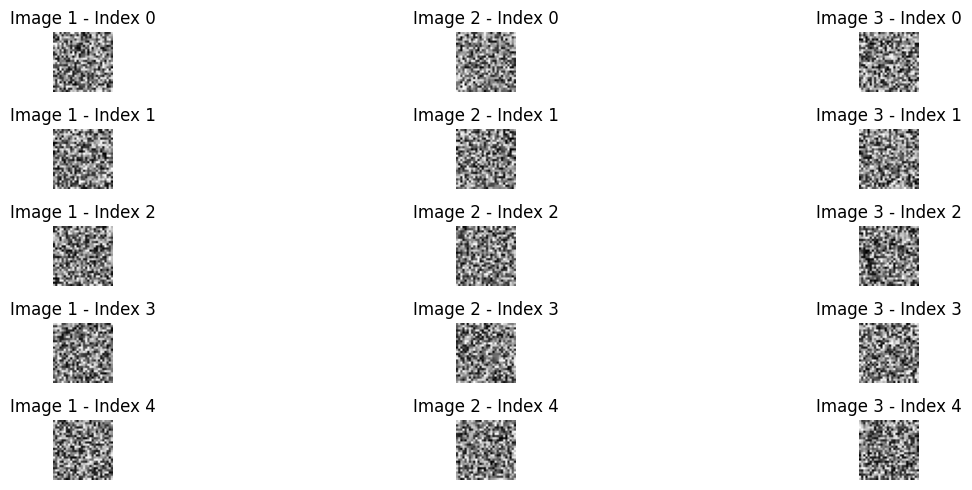

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Creating three random image arrays
# Assuming each image is of size 28x28 and there are 5 images
image1 = np.random.rand(5, 28, 28)  # First set of images
image2 = np.random.rand(5, 28, 28)  # Second set of images
image3 = np.random.rand(5, 28, 28)  # Third set of images

# Number of images to display
num_images = image1.shape[0]

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop through each index and plot the images
for i in range(num_images):
    # Display the first image
    ax1 = plt.subplot(num_images, 3, i * 3 + 1)  # 3 columns
    plt.imshow(image1[i], cmap='gray')
    plt.axis('off')
    ax1.set_title('Image 1 - Index {}'.format(i))

    # Display the second image
    ax2 = plt.subplot(num_images, 3, i * 3 + 2)
    plt.imshow(image2[i], cmap='gray')
    plt.axis('off')
    ax2.set_title('Image 2 - Index {}'.format(i))

    # Display the third image
    ax3 = plt.subplot(num_images, 3, i * 3 + 3)
    plt.imshow(image3[i], cmap='gray')
    plt.axis('off')
    ax3.set_title('Image 3 - Index {}'.format(i))

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
def show_samplesss(max_rows=5, **kwargs):
    # Create a figure to display the images
    plt.figure(figsize=(15, 5))

    display(f"xxxx {len(kwargs)}")
    for i in range(max_rows):
        display(f"{i}")
        display(kwargs)
        for k,v in kwargs.items():
            display(f"..{k}..")

show_samplesss(max_rows=4, a=1, b=2)

'xxxx 2'

'0'

{'a': 1, 'b': 2}

'..a..'

'..b..'

'1'

{'a': 1, 'b': 2}

'..a..'

'..b..'

'2'

{'a': 1, 'b': 2}

'..a..'

'..b..'

'3'

{'a': 1, 'b': 2}

'..a..'

'..b..'

<Figure size 1500x500 with 0 Axes>

'0'

'..0-image_1-1..'

'..0-img_2-2..'

'1'

'..1-image_1-1..'

'..1-img_2-2..'

'2'

'..2-image_1-1..'

'..2-img_2-2..'

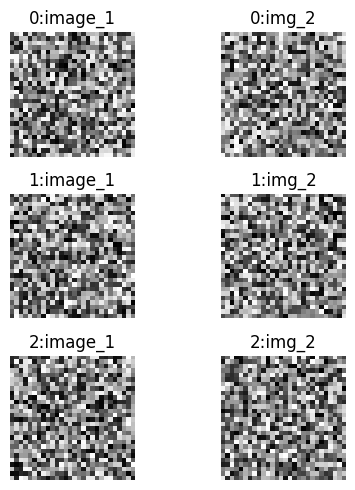

In [27]:
def show_samples(max_rows=5, **image_arrays):
    # Create a figure to display the images
    plt.figure(figsize=(5, 5))

    columns = len(image_arrays)  # Nbr of columns equals number of names arrays passed
    for i in range(max_rows):
        display(f"{i}")
        col = 1
        for k,v in image_arrays.items():
            display(f"..{i}-{k}-{col}..")
            # Display the first image
            ax_c = plt.subplot(max_rows, columns, i * columns + col)
            plt.imshow(v[i], cmap="gray")
            plt.axis("off")
            ax_c.set_title(f"{i}:{k}")
            col = col+1
    # Adjust layout
    plt.tight_layout()
    plt.show()

show_samples(max_rows=3, image_1=image1, img_2=image2)

In [29]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [13]:
import tensorflow as tf
display(tf.__version__)

x = tf.constant([[4., 3.], [2., 1.]])
tf.reduce_mean(x)

'2.18.0'

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [12]:
import pandas as pd
import statistics

statistics.mean([1,2,3,4])

2.5

In [3]:
import numpy as np

# Create two sample NumPy arrays representing images
# Let's say we have 5 images of size (60, 67)
num_images = 5
image1 = np.random.rand(num_images, 60, 67)  # First set of images
image2 = np.random.rand(num_images, 60, 67)  # Second set of images

# display
display(image1.shape)

# Calculate the Mean Squared Error (MSE for each pair of images)
mse_values = np.mean((image1 - image2) ** 2, axis=(1, 2))

# Output the result
print("Mean Squared Error for each image pair:", mse_values)

(5, 60, 67)

Mean Squared Error for each image pair: [0.1635324  0.16744839 0.16840619 0.16007069 0.16969918]
